## <b><i>Matemática para Ciência de Dados</i></b><br>
<b>Importação de Bibliotecas e Configurações para os Gráficos

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_params = {
    "axes.facecolor": "#111",     # Cor de fundo dos gráficos
    "figure.facecolor": "#111",   # Cor de fundo da figura
    "text.color": "white",        # Cor do texto # plt.title
    "axes.labelcolor": "white",   # Cor dos rótulos dos eixos
    "xtick.color": "white",       # Cor dos ticks do eixo x
    "ytick.color": "white",       # Cor dos ticks do eixo y
    "axes.edgecolor": "white",    # Cor das bordas dos gráficos
}

plt.rcParams["axes.spines.top"]= False
plt.rcParams["axes.spines.right"]= False
plt.style.use(custom_params)

Função

$y = x^2$

Avaliada nos inteiros entre -5 e 5

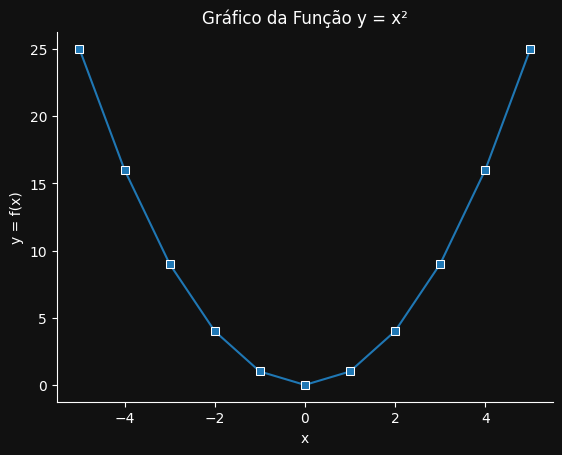

In [11]:
def f(x):
    y= x ** 2
    return y

x= np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]) # Vetor
y= f(x)

sns.lineplot(x=x, y=y, marker= 's')
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Gráfico da Função y = x²")
plt.show()

Função $y = (x − θ)^2$

Avaliada nos pontos:

$x = (−5, −4, −3, −2, −1, 0, 1, 2, 3, 4, 5)$

$θ = (−2, 0, 2)$

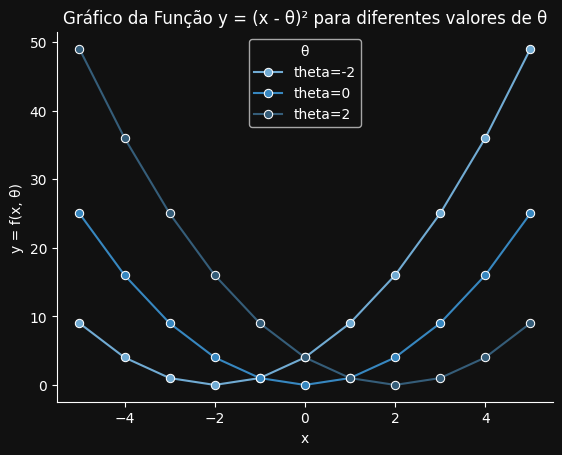

In [12]:
def fx(x, theta):
    out = (x[:, np.newaxis] - theta)**2
    return out

x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
theta = np.array([-2, 0, 2])

results = fx(x, theta)

df = pd.DataFrame(results, columns=[f'theta={t}' for t in theta])
df['x'] = x

df_long = df.melt(id_vars='x', var_name='theta', value_name='y')

sns.lineplot(data=df_long, x='x', y='y', hue='theta', marker= 'o', palette="Blues_d")
plt.xlabel("x")
plt.ylabel("y = f(x, θ)")
plt.title("Gráfico da Função y = (x - θ)² para diferentes valores de θ")
plt.legend(title='θ')
plt.show()

Matriz resultante da Função

$y = (x − θ)^2$

In [13]:
df

,theta=-2,theta=0,theta=2,x
0,9,25,49,-5
1,4,16,36,-4
2,1,9,25,-3
3,0,4,16,-2
4,1,1,9,-1
5,4,0,4,0
6,9,1,1,1
7,16,4,0,2
8,25,9,1,3
9,36,16,4,4


Função de dois parâmetros

$\Large y = \frac{(x - \theta_1)^2}{\theta_2}$

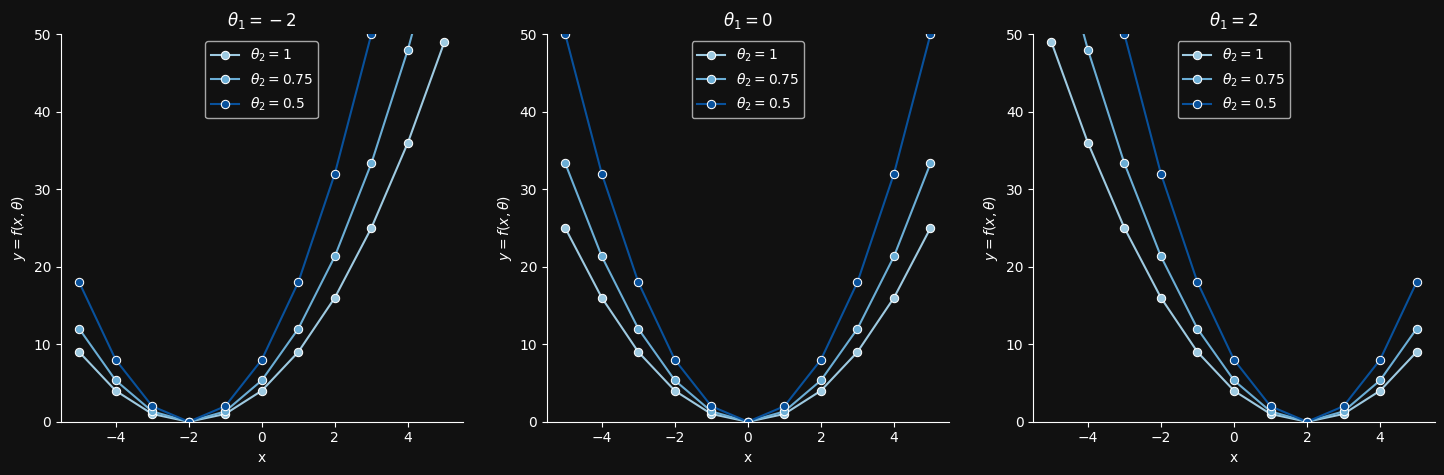

In [14]:
def fx(x, theta):
    return ((x - theta[0]) ** 2) / theta[1]

x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

# Configurando os valores de theta1
theta1 = [-2, 0, 2]

# Configurando os gráficos para ter 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=3)

# Expressões para o título de cada gráfico
titles = [r'$\theta_1 = -2$', r'$\theta_1 = 0$', r'$\theta_1 = 2$']

# Loop para criar cada gráfico
for i in range(3):
    ax = axes[i]  # Selecionando o subplot
    
    # Plotando para theta2 = 1 (linha amarela)
    y1 = fx(x, theta=[theta1[i], 1])
    sns.lineplot(x=x, y=y1, ax=ax, marker='o', label=r'$\theta_2 = 1$', color='#9ecae1')
    
    # Plotando para theta2 = 0.75 (linha vermelha)
    y2 = fx(x, theta=[theta1[i], 0.75])
    sns.lineplot(x=x, y=y2, ax=ax, marker='o', label=r'$\theta_2 = 0.75$', color='#6baed6')
    
    # Plotando para theta2 = 0.5 (linha azul)
    y3 = fx(x, theta=[theta1[i], 0.5])
    sns.lineplot(x=x, y=y3, ax=ax, marker='o', label=r'$\theta_2 = 0.5$', color='#08519c')

    # Configurações de cada gráfico
    ax.set_ylim(0, 50)
    ax.set_xlabel("x")
    ax.set_ylabel(r'$y = f(x, \theta)$')
    ax.set_title(titles[i])
    ax.legend(loc='upper center')

plt.show()

Considerando a função de duas variáveis independentes:

$f(x_1, x_2) = \sqrt{25 - x_1^2 - x_2^2}$

Vamos avalia-la nos pontos:

$x=(0,0), x=(3,0)$

In [20]:
def fx1x2(x):
    y = np.sqrt(25 - x[0]**2 - x[1]**2)
    return y

entrada1 = np.array([0, 0])
entrada2 = np.array([3, 0])
saida = np.array([fx1x2(entrada1), fx1x2(entrada2)])

print("Entrada:\n", np.array([entrada1, entrada2]))
print(f"Saída: {saida}\n")

Entrada:
 [[0 0]
 [3 0]]
Saída: [5. 4.]



Funções polinomiais são funções do tipo 

$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_p x^p.$

Por exemplo, as funções polinomiais de grau até três são apresentadas abaixo:

- Função linear: $y = \beta_0 + \beta_1 x$.
- Função quadrática: $y = \beta_0 + \beta_1 x + \beta_2 x^2$.
- Função cúbica: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$.

Alguns pontos importantes a notar:

- Em todas as funções os parâmetros são representados pela letra $\beta$ associada a um índice para distinguir entre os coeficientes.
- O gráfico da função linear é sempre uma reta.
- O gráfico de uma função quadrática é uma parábola aberta para cima se $\beta_2 > 0$ e para baixo se $\beta_2 < 0$
- O intercepto é dado por $\beta_0$ em todas as funções.
- Nas funções lineares o parâmetro $\beta_1$ representa a declividade da linha.
- A função cúbica pode ser simplificada para quadrática fazendo $\beta_3 = 0$ e para linear fazendo ambos $\beta_3 = \beta_2 = 0$.

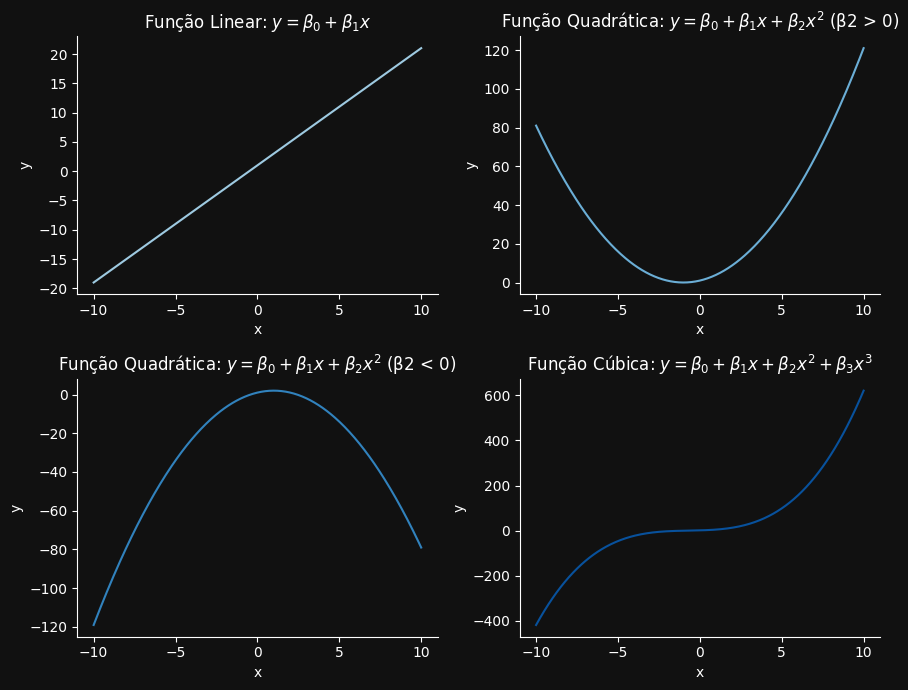

In [16]:
# Gerando dados
x = np.linspace(-10, 10, 400)

# Coeficientes para cada função
beta_0 = 1
beta_1 = 2
beta_2_positive = 1
beta_2_negative = -1
beta_3 = 0.5

# Funções
linear = beta_0 + beta_1 * x
quadratic_up = beta_0 + beta_1 * x + beta_2_positive * x**2
quadratic_down = beta_0 + beta_1 * x + beta_2_negative * x**2
cubic = beta_0 + beta_1 * x + beta_2_positive * x**2 + beta_3 * x**3

# Criando os gráficos com seaborn e matplotlib
plt.figure(figsize=(9, 7))

# Função linear
plt.subplot(2, 2, 1)
sns.lineplot(x=x, y=linear, color="#9ecae1")
plt.title('Função Linear: $y = \\beta_0 + \\beta_1 x$')
plt.xlabel('x')
plt.ylabel('y')

# Função quadrática (parábola aberta para cima)
plt.subplot(2, 2, 2)
sns.lineplot(x=x, y=quadratic_up, color="#6baed6")
plt.title('Função Quadrática: $y = \\beta_0 + \\beta_1 x + \\beta_2 x^2$ (β2 > 0)')
plt.xlabel('x')
plt.ylabel('y')

# Função quadrática (parábola aberta para baixo)
plt.subplot(2, 2, 3)
sns.lineplot(x=x, y=quadratic_down, color="#3182bd")
plt.title('Função Quadrática: $y = \\beta_0 + \\beta_1 x + \\beta_2 x^2$ (β2 < 0)')
plt.xlabel('x')
plt.ylabel('y')

# Função cúbica
plt.subplot(2, 2, 4)
sns.lineplot(x=x, y=cubic, color="#08519c")
plt.title('Função Cúbica: $y = \\beta_0 + \\beta_1 x + \\beta_2 x^2 + \\beta_3 x^3$')
plt.xlabel('x')
plt.ylabel('y')

# Ajustando layout
plt.tight_layout()
plt.show()

Funções do tipo potência são funções da forma 

$y = x^a$ 

Funções exponenciais são funções compostas de uma base \(a\) constante e de um expoente variável, ou seja, 

$y = a^x$ 

Funções exponenciais naturais são funções exponenciais que têm como sua base 

$e = \lim_{n \to \infty} \left[1 + \frac{1}{n}\right]^n \approx 2,718281828459045$ 

Algumas propriedades importantes de expoentes naturais:

- $e^0 = 1$.
- $e^1 = e \approx 2,71828$.
- $e^a \cdot e^b = e^{a + b}$.
- $(e^a)^b = e^{ab}$
- $\frac{e^a}{e^b} = e^{a - b}$.


In [17]:
NUMERO_DE_EULER = 2.718281828459045
e = NUMERO_DE_EULER

print(f"e¹ = {e ** 1}")

resultado_euler = (e ** 5) * (e ** 10) == (e ** (5 + 10))
print(f"e⁵ * e¹⁰ = e¹⁵ -> {resultado_euler}")

e¹ = 2.718281828459045
e⁵ * e¹⁰ = e¹⁵ -> True


Funções logarítmicas ou logaritmo é a potência à qual uma dada base deve ser elevada para se obter um particular número.

$\log_a y = x$

Algumas relações entre funções logarítmicas e exponenciais:

- Se $ \log_{10} y = 2x $, então $ y = 10^{2x} $.
- Se $ \log_a y = xz $, então $ y = a^{xz} $.
- Se $ \ln y = 5t $, então $ y = e^{5t} $.
- Se $ y = a^{3x} $, então $ \log_a y = 3x $.
- Se $ y = 10^{6x} $, então $ \log_{10} y = 6x $.
- Se $ y = e^{t+1} $, então $ \ln y = t + 1 $.

Outras funções importantes no contexto de redes neurais artificiais são as seguintes:

- Função sigmóide ou logística: $ y = \frac{1}{1 + e^{-x}} $, onde $ I = (0, 1) $ e $ D = \mathbb{R} $;
- Função tangente hiperbólica: $ y = \frac{e^x - e^{-x}}{e^x + e^{-x}} $, onde $ I = (-1, 1) $ e $ D = \mathbb{R} $.
- Função linear retificada (ReLU): $ y = \max\{0, x\} $, onde $ I = \mathbb{R}^+ $ e $ D = \mathbb{R} $.
- Função leaky ReLU: $ y = \max\{\alpha x, x\} $, onde $ \alpha $ é um parâmetro conhecido, $ I = \mathbb{R} $ e $ D = \mathbb{R} $.


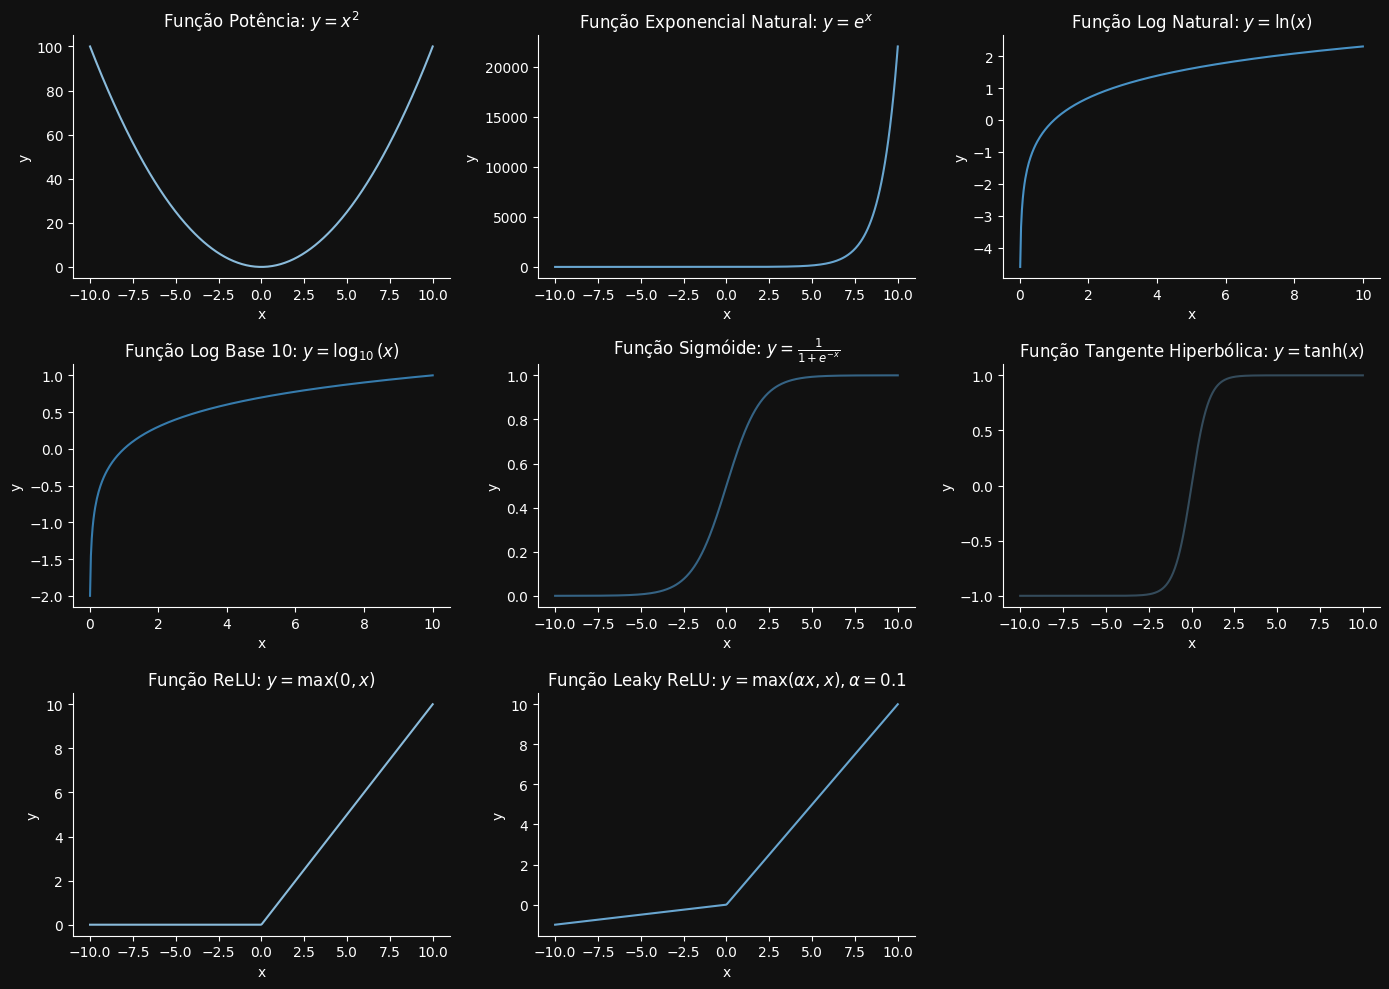

In [18]:
x = np.linspace(-10, 10, 400)
x_positive = np.linspace(0.01, 10, 400)  # Para evitar log(0) e evitar erros

# Funções
def potencia(x, a=2):
    return x ** a

def exponencial_natural(x):
    return np.exp(x)

def log_natural(x):
    return np.log(x)

def log_10(x):
    return np.log10(x)

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

plt.figure(figsize=(14, 10))

# Função Potência (a=2)
plt.subplot(3, 3, 1)
sns.lineplot(x=x, y=potencia(x), color=sns.color_palette("Blues_d")[-6])
plt.title('Função Potência: $y = x^2$')
plt.xlabel('x')
plt.ylabel('y')

# Função Exponencial Natural
plt.subplot(3, 3, 2)
sns.lineplot(x=x, y=exponencial_natural(x), color=sns.color_palette("Blues_d")[-5])
plt.title('Função Exponencial Natural: $y = e^x$')
plt.xlabel('x')
plt.ylabel('y')

# Função Log Natural
plt.subplot(3, 3, 3)
sns.lineplot(x=x_positive, y=log_natural(x_positive), color=sns.color_palette("Blues_d")[-4])
plt.title(r'Função Log Natural: $y = \ln(x)$')
plt.xlabel('x')
plt.ylabel('y')

# Função Log Base 10
plt.subplot(3, 3, 4)
sns.lineplot(x=x_positive, y=log_10(x_positive), color=sns.color_palette("Blues_d")[-3])
plt.title(r'Função Log Base 10: $y = \log_{10}(x)$')
plt.xlabel('x')
plt.ylabel('y')

# Função Sigmóide
plt.subplot(3, 3, 5)
sns.lineplot(x=x, y=sigmoide(x), color=sns.color_palette("Blues_d")[-2])
plt.title(r'Função Sigmóide: $y = \frac{1}{1 + e^{-x}}$')
plt.xlabel('x')
plt.ylabel('y')

# Função Tangente Hiperbólica
plt.subplot(3, 3, 6)
sns.lineplot(x=x, y=tanh(x), color=sns.color_palette("Blues_d")[-1])
plt.title(r'Função Tangente Hiperbólica: $y = \tanh(x)$')
plt.xlabel('x')
plt.ylabel('y')

# Função ReLU
plt.subplot(3, 3, 7)
sns.lineplot(x=x, y=relu(x), color=sns.color_palette("Blues_d")[0])
plt.title(r'Função ReLU: $y = \max(0, x)$')
plt.xlabel('x')
plt.ylabel('y')

# Função Leaky ReLU (α=0.1)
plt.subplot(3, 3, 8)
sns.lineplot(x=x, y=leaky_relu(x), color=sns.color_palette("Blues_d")[1])
plt.title(r'Função Leaky ReLU: $y = \max(\alpha x, x), \alpha=0.1$')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()